#### Problem Statement: 
    Classification using Deep neural network (Any One from the following)
        1. Multiclass classification using Deep Neural Networks: Example: Use the OCR letter recognition dataset 
        2. Binary classification using Deep Neural Networks Example: Classify movie reviews into positive" reviews and "negative" reviews, just based on the text content of the reviews. Use IMDB dataset
OCR  Dataset: https://archive.ics.uci.edu/ml/datasets/letter+recognition                                                  
IMDB Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download?datasetVersionNumber=1

## Multiclass Classification

Attribute Information:
1. lettr capital letter (26 values from A to Z)
2. x-box horizontal position of box (integer)
3. y-box vertical position of box (integer)
4. width width of box (integer)
5. high height of box (integer)
6. onpix total # on pixels (integer)
7. x-bar mean x of on pixels in box (integer)
8. y-bar mean y of on pixels in box (integer)
9. x2bar mean x variance (integer)
10. y2bar mean y variance (integer)
11. xybar mean x y correlation (integer)
12. x2ybr mean of x * x * y (integer)
13. xy2br mean of x * y * y (integer)
14. x-ege mean edge count left to right (integer)
15. xegvy correlation of x-ege with y (integer)
16. y-ege mean edge count bottom to top (integer)
17. yegvx correlation of y-ege with x (integer)

### Importing libraries

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

### Data Preprocessing

In [2]:
# set the file path
file_path = 'letter-recognition.data'

# read the .data file into a pandas dataframe
column_names = ["letter", "x-box", "y-box", "width", "height", "onpix", "x-bar", "y-bar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"]
df = pd.read_csv(file_path, delimiter=r",", names=column_names)

# display the first 5 rows of the dataframe
df

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
df.isna().sum()

letter    0
x-box     0
y-box     0
width     0
height    0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

In [4]:
# Split into features and target
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [5]:
x

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]], dtype=int64)

In [6]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [7]:
# create a LabelEncoder object
encoder = LabelEncoder()

# fit the encoder to the labels and transform them
y = encoder.fit_transform(y)

In [8]:
y

array([19,  8,  3, ..., 19, 18,  0])

### Split Train and Test Data

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

In [10]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 16)
(4000, 16)
(16000,)
(4000,)


### Neural Network Model

In [12]:
# define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [13]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 26)                442       
Total params: 1,514
Trainable params: 1,514
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fit model
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 2.2962 - accuracy: 0.3504: 0s - loss: 2.7461 - accura
Epoch 2/100
500/500 [==============================] - 1s 1ms/step - loss: 1.2126 - accuracy: 0.6438
Epoch 3/100
500/500 [==============================] - 1s 1ms/step - loss: 0.9662 - accuracy: 0.7204
Epoch 4/100
500/500 [==============================] - 1s 1ms/step - loss: 0.8351 - accuracy: 0.7599
Epoch 5/100
500/500 [==============================] - 1s 1ms/step - loss: 0.7474 - accuracy: 0.7853
Epoch 6/100
500/500 [==============================] - 1s 1ms/step - loss: 0.6839 - accuracy: 0.8016
Epoch 7/100
500/500 [==============================] - 1s 1ms/step - loss: 0.6348 - accuracy: 0.8147
Epoch 8/100
500/500 [==============================] - 1s 1ms/step - loss: 0.5967 - accuracy: 0.8259
Epoch 9/100
500/500 [==============================] - 1s 1ms/step - loss: 0.5657 - accuracy: 0.8331
Epoch 10/100
500/500 [==============================] - 1s 1ms/

### Evaluating Performace

In [16]:
# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3%}')

125/125 [==============================] - 0s 882us/step - loss: 0.3138 - accuracy: 0.9013
Test loss: 0.314
Test accuracy: 90.125%


In [17]:
# predict the class probabilities for the test data
y_pred = model.predict(x_test)
print(y_test)

[ 3  3 21 ... 20  0  0]


In [18]:
# convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred = encoder.inverse_transform(y_pred)
y_test = encoder.inverse_transform(y_test)

In [20]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_preds

,Actual,Predicted
0,D,D
1,D,D
2,V,V
3,B,B
4,H,H
...,...,...
3995,Z,Z
3996,S,E
3997,U,U
3998,A,A


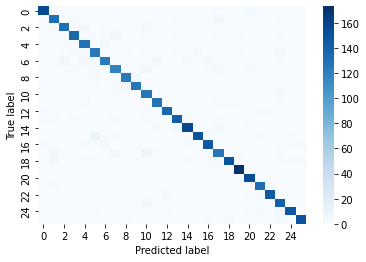

In [21]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=False, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Binary Classification

### Importing libraries

In [22]:
import re
import nltk
from tqdm.auto import tqdm
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [23]:
# Load the dataset
data = pd.read_csv("IMDB Dataset.csv")

In [24]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [25]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [26]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [27]:
data.shape

(50000, 2)

In [28]:
data = data.iloc[:10000, :]
data.shape

(10000, 2)

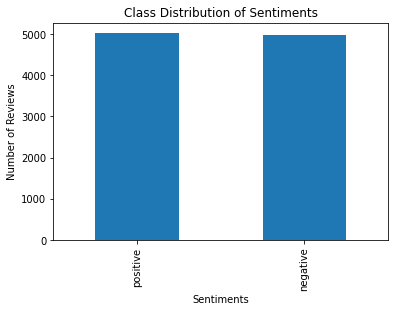

In [29]:
# Create a bar plot of the class distribution
class_counts = data['sentiment'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Number of Reviews')
plt.show()

In [30]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [31]:
tqdm.pandas()
data['cleaned_text'] = data['review'].progress_apply(clean_text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [32]:
# create a mapping dictionary to replace "positive" with 1 and "negative" with 0
mapping = {'positive': 1, 'negative': 0}

# use the map() function to apply the mapping dictionary to the "sentiment" column
data['sentiment'] = data['sentiment'].map(mapping)

In [33]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(data['cleaned_text']).toarray()
y = data['sentiment']

In [34]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
X.shape

(10000, 5000)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Neural Network Model

In [37]:
# Import libraries
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4174 - accuracy: 0.8194 - val_loss: 0.3508 - val_accuracy: 0.8506
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1760 - accuracy: 0.9367 - val_loss: 0.4071 - val_accuracy: 0.8462
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0893 - accuracy: 0.9712 - val_loss: 0.4985 - val_accuracy: 0.8450
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0328 - accuracy: 0.9923 - val_loss: 0.6626 - val_accuracy: 0.8438
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0095 - accuracy: 0.9989 - val_loss: 0.7656 - val_accuracy: 0.8500
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.8679 - val_accuracy: 0.8500
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.9434 - val_accuracy: 0.8494

In [40]:
# evaluate the classifier on the test set
y_pred = model.predict(X_test)

In [41]:
y_pred = [0 if i < 0.5 else 1 for i in y_pred]
y_pred

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


### Evaluating Performance

In [42]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3%}')

63/63 [==============================] - 0s 3ms/step - loss: 2.3135 - accuracy: 0.8490
Test loss: 2.31
Test accuracy: 84.900%


In [43]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.849


### Confusion Matrix

<AxesSubplot:>

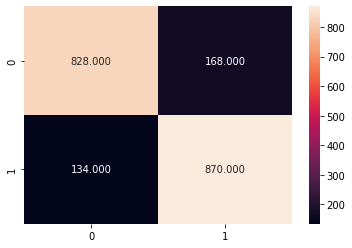

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.3f')